PROBLEM DEFINITION
OBJECTIVE:
To analyze key factors that contribute to high burnout and turnover rates in the
healthcare workforce, identifying departments, job roles, and workplace conditions
that are most at risk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:/Users/MUSAWENKOSI NYAWO/Downloads/New folder/Healthcare Workforce Mental Health Dataset.csv')
df

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No
...,...,...,...,...,...,...,...,...,...,...
4995,HCP-04996,Radiology Technician,Radiology,Career Stagnation,5,Occasionally,3,No,4,No
4996,HCP-04997,Registered Nurse,General Medicine,Work-Life Imbalance,7,Never,4,No,5,No
4997,HCP-04998,Critical Care Nurse,ICU,Safety Concerns,7,Occasionally,4,Yes,5,No
4998,HCP-04999,Healthcare Administrator,Administration,Career Stagnation,5,Occasionally,3,Yes,4,No


In [3]:
df.sample(5)

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
1548,HCP-01549,Registered Nurse,General Medicine,Heavy Workload,8,Often,2,No,7,Yes
4555,HCP-04556,Medical Assistant,Outpatient Services,Work-Life Imbalance,8,Often,1,No,13,Yes
3215,HCP-03216,Registered Nurse,General Medicine,Heavy Workload,8,Occasionally,2,Yes,9,Yes
4410,HCP-04411,Registered Nurse,General Medicine,Heavy Workload,8,Often,2,Yes,9,Yes
4593,HCP-04594,Critical Care Nurse,ICU,Heavy Workload,8,Never,4,No,9,Yes


In [4]:
df.describe()

,Stress Level,Job Satisfaction,Mental Health Absences
count,5000.000000,5000.000000,5000.000000
mean,7.327800,2.202200,7.396200
std,1.407673,1.045722,2.878625
min,4.000000,1.000000,0.000000
25%,7.000000,1.000000,5.000000
50%,8.000000,2.000000,7.000000
75%,8.000000,3.000000,9.000000
max,9.000000,5.000000,19.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee ID             5000 non-null   object
 1   Employee Type           5000 non-null   object
 2   Department              5000 non-null   object
 3   Workplace Factor        5000 non-null   object
 4   Stress Level            5000 non-null   int64 
 5   Burnout Frequency       5000 non-null   object
 6   Job Satisfaction        5000 non-null   int64 
 7   Access to EAPs          5000 non-null   object
 8   Mental Health Absences  5000 non-null   int64 
 9   Turnover Intention      5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


In [6]:
df.isna().sum()

Employee ID               0
Employee Type             0
Department                0
Workplace Factor          0
Stress Level              0
Burnout Frequency         0
Job Satisfaction          0
Access to EAPs            0
Mental Health Absences    0
Turnover Intention        0
dtype: int64

In [7]:
df.isnull()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


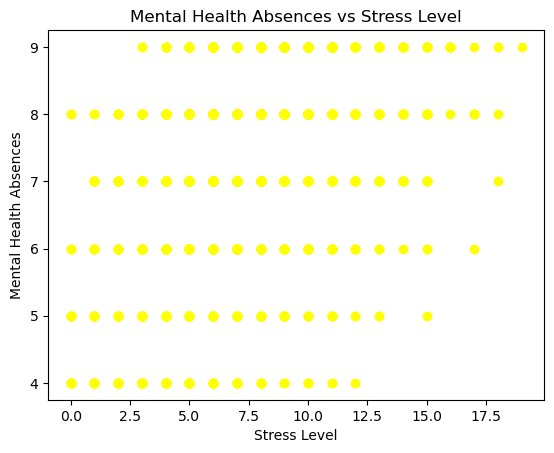

In [8]:
# Mental Health Absences based on Stress Leves
plt.scatter(df['Mental Health Absences'], df['Stress Level'], color='yellow')
plt.xlabel('Stress Level')
plt.ylabel('Mental Health Absences')
plt.title('Mental Health Absences vs Stress Level')
plt.show()

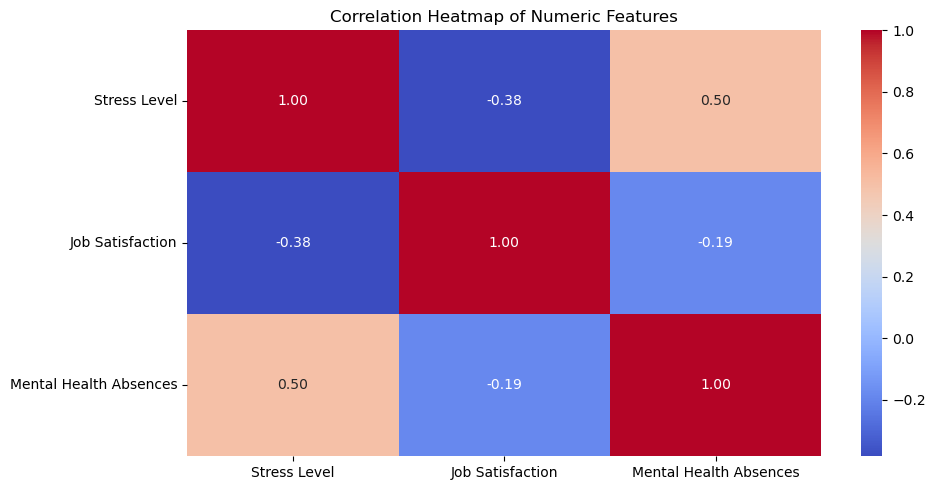

In [9]:
# Select only numeric columns for correlation
import seaborn as sns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## Split Data into Train and Test Sets

In [10]:
x = np.random.rand(100,5)
y = np.random.randint(0,2,100)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                     test_size=0.2,
                                                       random_state=42)


In [11]:
df.value_counts()

Employee ID  Employee Type             Department           Workplace Factor       Stress Level  Burnout Frequency  Job Satisfaction  Access to EAPs  Mental Health Absences  Turnover Intention
HCP-00001    Pediatric Nurse           Pediatrics           Heavy Workload         8             Often              2                 Yes             6                       No                    1
HCP-03331    Medical Assistant         Outpatient Services  Heavy Workload         7             Often              1                 No              6                       No                    1
HCP-03338    Healthcare Administrator  Administration       Career Stagnation      4             Never              4                 Yes             4                       Yes                   1
HCP-03337    Radiology Technician      Radiology            Heavy Workload         9             Often              1                 Yes             8                       Yes                   1
HCP-03336    Nu

In [12]:
x_train

array([[9.75581881e-01, 9.43880710e-01, 8.26717897e-01, 2.30853927e-01,
        9.77937057e-01],
       [8.80285645e-01, 4.29169217e-01, 5.92830316e-01, 1.50007445e-01,
        7.74893135e-01],
       [8.46092841e-01, 5.06057700e-01, 9.44646886e-01, 2.56511933e-01,
        6.82181144e-01],
       [2.85032481e-01, 8.61118462e-01, 9.38781812e-01, 3.58820916e-01,
        4.89996127e-02],
       [4.66446159e-01, 9.74420709e-01, 3.89630076e-01, 2.26370858e-01,
        3.75000737e-01],
       [8.20045186e-01, 5.48391570e-01, 8.62159825e-01, 1.68782615e-01,
        2.12289395e-01],
       [7.06385504e-01, 9.85327478e-01, 3.81765829e-01, 5.49119731e-01,
        2.83522503e-01],
       [6.66362868e-01, 2.67982405e-01, 4.28580691e-01, 2.29793949e-01,
        2.21809389e-01],
       [1.33902662e-01, 9.14520987e-01, 1.58922426e-01, 1.56874072e-01,
        9.48616390e-02],
       [2.73375158e-01, 6.21716562e-01, 3.84012252e-01, 7.60467442e-01,
        9.61810248e-01],
       [6.94152736e-01, 3.9263

In [13]:
y_train

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

## Model Fitting

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# Support Vector Machine(SMV)
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)
svm_model

SVC(kernel='linear')

In [16]:
# Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train,y_train)
linear_regression_model

LinearRegression()

In [17]:
# Random Forest
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train,y_train)
random_forest_regressor

RandomForestRegressor()

In [18]:
model_score = {}
model_score[svm_model] = svm_model.score(x_test,y_test)
model_score[svm_model]

0.4

In [19]:
model_score = {}
model_score[linear_regression_model] = linear_regression_model.score(x_test,y_test)
model_score[linear_regression_model]

0.005266034784881524

In [20]:
model_score = {}
model_score[random_forest_regressor] = random_forest_regressor.score(x_test,y_test)
model_score[random_forest_regressor]

0.02316666666666689

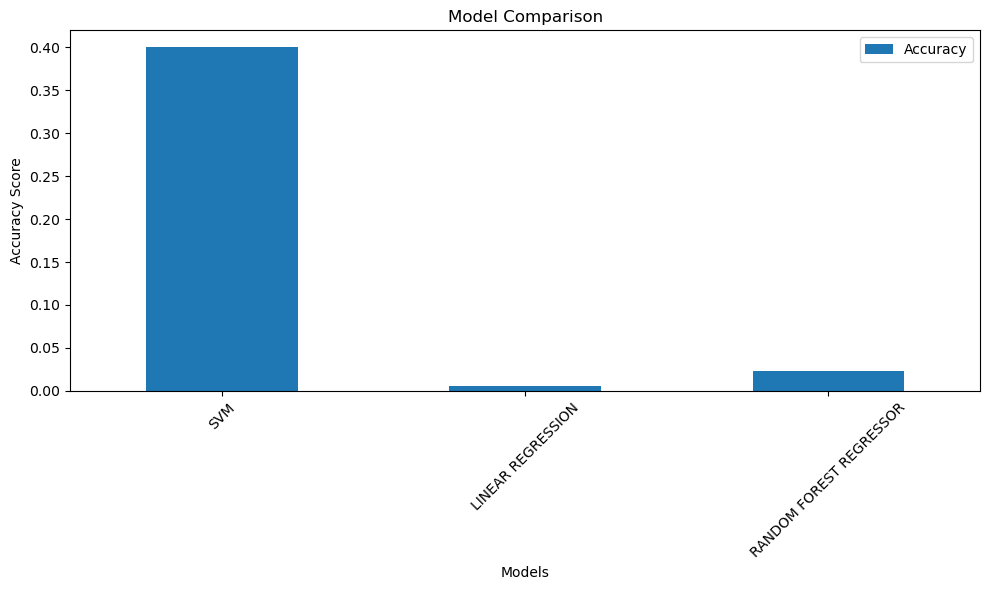

In [21]:
model_scores = {
    'SVM': svm_model.score(x_test, y_test),
    'LINEAR REGRESSION': linear_regression_model.score(x_test, y_test),
    'RANDOM FOREST REGRESSOR': random_forest_regressor.score(x_test, y_test)
}
model_compare = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy'])
model_compare.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Predictions

In [22]:
# SVM PREDICTION
y_pred = svm_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
# LINEAR REGRESSION PREDICTION
y_pred_lr = linear_regression_model.predict(x_test)
y_pred_lr


array([0.67013721, 0.61485559, 0.69514833, 0.47642971, 0.53167703,
       0.62713651, 0.6463624 , 0.62702241, 0.63204181, 0.46768457,
       0.7753825 , 0.41050201, 0.69809702, 0.47817352, 0.57635614,
       0.38448747, 0.52555158, 0.73793421, 0.53027058, 0.60350303])

In [24]:
# RANDOM FOREST PREDICTION
y_pred_rf = random_forest_regressor.predict(x_test)
y_pred_rf

array([0.83, 0.4 , 0.79, 0.73, 0.42, 0.54, 0.59, 0.65, 0.71, 0.25, 0.41,
       0.46, 0.77, 0.67, 0.46, 0.48, 0.41, 0.94, 0.56, 0.67])

## Data Preprocessing

In [25]:
from sklearn.preprocessing import StandardScaler, Normalizer, Binarizer, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

In [26]:
# Standardization
scaler = StandardScaler()
scaler.fit(x_train)
standardized_x_train = scaler.transform(x_train)
standardized_x_test = scaler.transform(x_test)

In [27]:
# Normalization
scaler = Normalizer()
scaler.fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)


In [28]:
# Binarization
binarizer = Binarizer()
binarizer.fit(x)
binary_x = binarizer.transform(x)

In [29]:
# Encoding Categorical Features
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [30]:
# Generating Polynomial Features
poly = PolynomialFeatures()
poly.fit_transform(x)

array([[1.        , 0.36787968, 0.0611573 , ..., 0.18342863, 0.20718771,
        0.23402425],
       [1.        , 0.90668244, 0.81336423, ..., 0.01343494, 0.01083788,
        0.00874284],
       [1.        , 0.40576132, 0.2683651 , ..., 0.03014632, 0.08652229,
        0.24832568],
       ...,
       [1.        , 0.50739783, 0.09259434, ..., 0.65314019, 0.70569801,
        0.76248513],
       [1.        , 0.58276559, 0.24454044, ..., 0.27300857, 0.18863002,
        0.13033029],
       [1.        , 0.3313572 , 0.08218491, ..., 0.39881479, 0.18743309,
        0.08808892]])

## Model Evaluation

In [31]:
# Classification Report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
svm_model.score(x_test, y_test)

0.4

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



c:\Users\MUSAWENKOSI NYAWO\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MUSAWENKOSI NYAWO\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MUSAWENKOSI NYAWO\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
print(confusion_matrix(y_test,y_pred))

[[ 0 12]
 [ 0  8]]


In [34]:
mean_absolute_error(y_test, y_pred)

0.6

In [35]:
mean_squared_error(y_test, y_pred)

0.6

In [36]:
r2_score(y_test, y_pred)

-1.4999999999999996

In [37]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm_model,
                      x_train,
                      y_train,
                      cv=5))

[0.5625 0.625  0.4375 0.625  0.5   ]


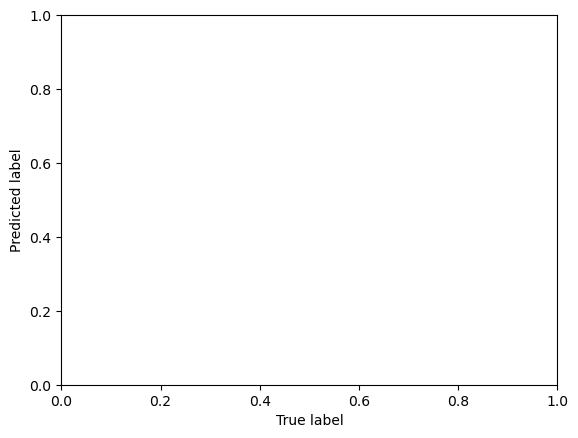

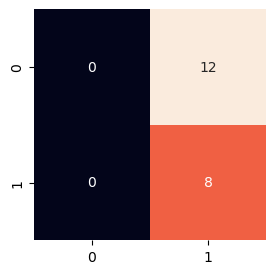

In [38]:
# sns.set(font_size=1.5)
def plot_conf_mat(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plot_conf_mat(y_test, y_pred) 

## Model Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.1, 'kernel': 'linear'}


In [40]:
svm_model = SVC(C=0.1, gamma='scale', kernel='linear')
svm_model.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [41]:
# Cross-val accuracy
cv_acc = cross_val_score(svm_model,
                         x,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.55, 0.55, 0.55, 0.6 , 0.6 ])

In [42]:
np.mean(cv_acc)

0.5700000000000001

In [43]:
# Cross- Recall
cv_recall = cross_val_score(svm_model,
                         x,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

1.0

In [44]:
# F1 Score
cv_f1 = cross_val_score(svm_model,
                         x,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.7258064516129032

In [45]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [46]:
x_test

array([[ 0.64223519, -0.08874634, -0.85729097,  0.69116168,  0.29601647],
       [ 0.5802371 ,  0.68742156, -0.9917242 , -1.58224853,  1.29350155],
       [ 0.20148678,  1.10864552,  0.7457724 ,  0.74769032,  0.08916577],
       [-1.49430186, -0.53786937,  0.3735728 , -1.62427549, -0.81512974],
       [-1.76150422, -0.37071589, -0.73872765,  1.82079269,  0.17047533],
       [-0.7667082 , -1.18553224, -1.99467711,  0.5592795 , -1.45346026],
       [-1.54945015,  0.54900936, -1.74920812,  1.4573979 , -0.20316725],
       [-0.1943107 , -0.26407271, -0.44101933,  0.53873108, -0.37548008],
       [ 0.42183566, -0.43126366, -1.33304374,  1.5910386 ,  0.95340105],
       [-0.83183486, -1.43567619, -0.23577915, -0.17274733, -0.07634529],
       [ 1.14098695,  0.96713271, -0.98945233, -1.55842103, -0.68240652],
       [-1.65458   , -1.35764201,  0.36619532,  0.63617533,  0.2018102 ],
       [ 0.42652546, -0.8075564 , -0.21571067,  1.49089775, -1.36065598],
       [-2.23927884, -0.27028911,  1.1

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distributions for random search
param_distributions = {
	'C': uniform(0.1, 100),
	'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
	'gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(10))
}

# Create RandomizedSearchCV object
randomized_search = RandomizedSearchCV(
	estimator=svm_model,
	param_distributions=param_distributions,
	n_iter=10,
	cv=5,
	random_state=42
)

# Fit the random search
randomized_search.fit(x_train, y_train)
print(randomized_search.best_score_)

0.6


Text(0, 0.5, 'Score')

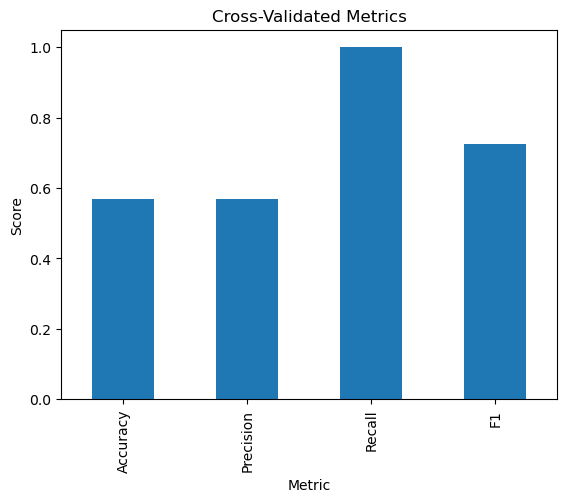

In [48]:
# Calculate precision using cross-validation
cv_precision = cross_val_score(svm_model,
                              x,
                              y,
                              cv=5,
                              scoring='precision')
cv_precision = np.mean(cv_precision)

# Visualize Cross-Validated Metrics
cv_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Score': [np.mean(cv_acc), cv_precision, cv_recall, cv_f1]
})
cv_metrics.plot.bar(x='Metric', y='Score', legend=False, title='Cross-Validated Metrics')
plt.ylabel('Score')